In [1]:
import numpy as np
import pandas as pd

# Read Data from the Dataset 

In [2]:
state_df = pd.read_csv('StatewiseTestingDetails.csv')
country_df = pd.read_csv('covid_19_india.csv')

In [3]:
state_df[state_df['State']=='Maharashtra'].head()

,Date,State,TotalSamples,Negative,Positive
8888,2020-04-05,Maharashtra,16008.0,14837,NaN
8889,2020-04-06,Maharashtra,17563.0,15808,868.0
8890,2020-04-07,Maharashtra,20877.0,19290,1018.0
8891,2020-04-09,Maharashtra,20877.0,19290,868.0
8892,2020-04-10,Maharashtra,30000.0,28865,1135.0


In [4]:
country_df[((country_df['Date']=='2020-04-04')&(country_df['State/UnionTerritory']=='Maharashtra'))]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
636,637,2020-04-04,6:00 PM,Maharashtra,-,-,42,24,490


In [14]:
print("Minimum date :",country_df['Date'].min())
print("Maximum date :",country_df['Date'].max())

Minimum date : 2020-01-30
Maximum date : 2021-08-11


In [6]:
df=country_df.copy()

# Checking for Null Values

In [7]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [10]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [11]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

df.drop(['Time'],axis=1, inplace=True)

df.rename(columns={'State/UnionTerritory':'States'}, inplace=True)

In [12]:
df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])

In [13]:
df[df['States']=='Tamil Nadu'].tail()

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases
17960,17961,2021-08-07,Tamil Nadu,-,-,2516938,34260,2571383,20185
17996,17997,2021-08-08,Tamil Nadu,-,-,2518777,34289,2573352,20286
18032,18033,2021-08-09,Tamil Nadu,-,-,2520584,34317,2575308,20407
18068,18069,2021-08-10,Tamil Nadu,-,-,2522470,34340,2577237,20427
18104,18105,2021-08-11,Tamil Nadu,-,-,2524400,34367,2579130,20363


# EDA (Exploratory Data Analysis) & Future Engineering

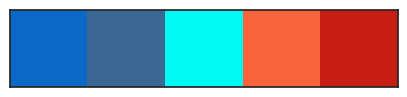

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mtd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

colors=['#0C68C7','#3A6794','#00FAF3','#FA643C','#C71D12']
sns.set(palette=colors, style='white')

sns.palplot(colors)

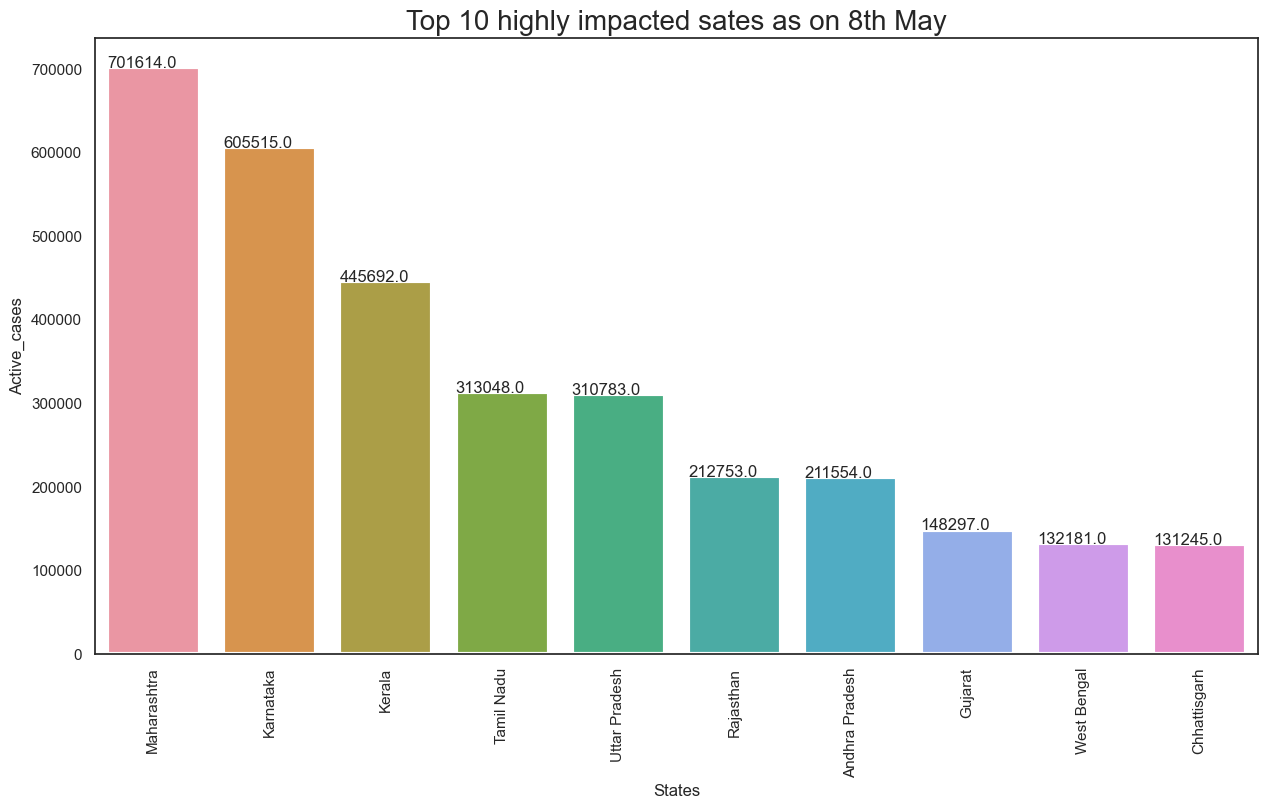

In [17]:
top_10=df.groupby(by='States').max()[['Active_cases','Date']].sort_values(by=['Active_cases'],ascending=False).reset_index()

fig=plt.figure(figsize=(15,8))
plt.title("Top 10 highly impacted sates as on 8th May", size=20)
ax=sns.barplot(data=top_10.iloc[:10],y='Active_cases',x='States', linewidth=3)
ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)

for i in ax.patches:
  ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())

Text(0.5, 1.0, 'Active cases by States')

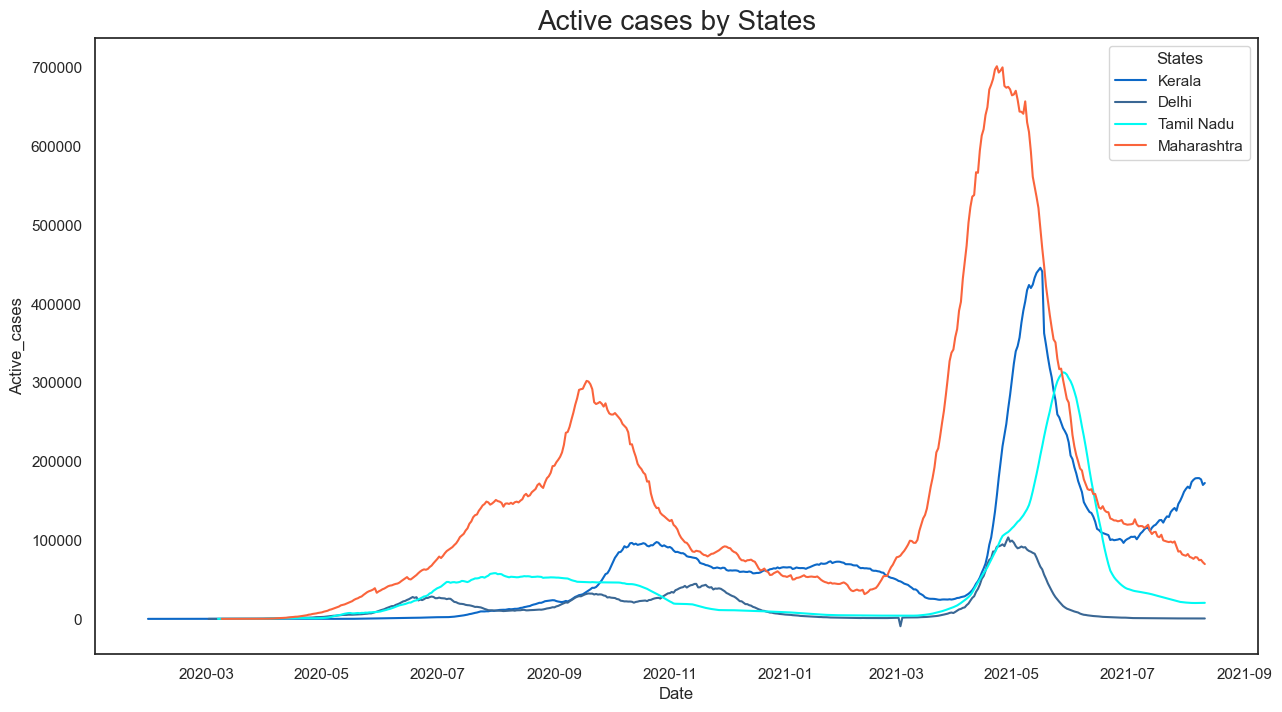

In [18]:
fig=plt.figure(figsize=(15,8))

ax=sns.lineplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Date',y='Active_cases',hue='States')
ax.set_title("Active cases by States", size=20)

Text(0.5, 1.0, 'Bar plot for sample states')

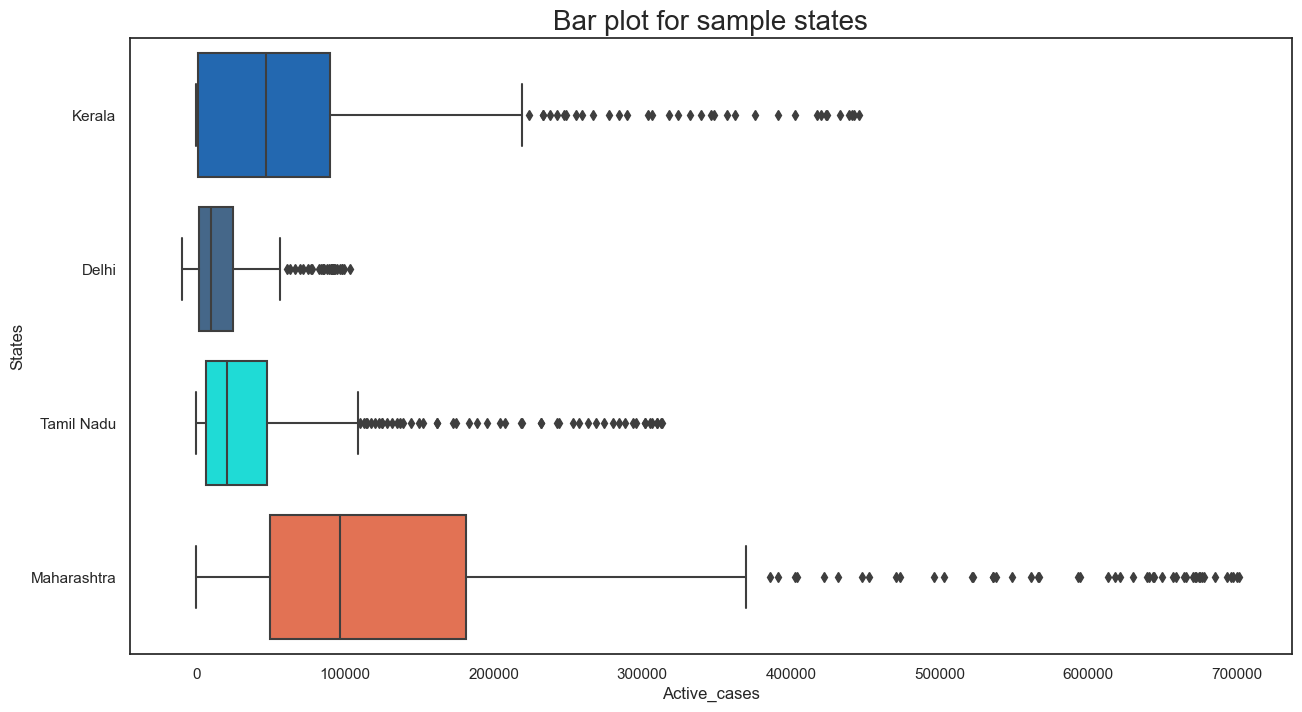

In [19]:
fig=plt.figure(figsize=(15,8))
sns.boxplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Active_cases',y='States')
plt.title("Bar plot for sample states" ,size=20)

In [20]:
median_states=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])]
median_states.groupby(by=['States']).median().style.bar(['Active_cases'])

C:\Users\Vinith MH\AppData\Local\Temp\ipykernel_13360\4240229378.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_states.groupby(by=['States']).median().style.bar(['Active_cases'])


,Sno,Cured,Deaths,Confirmed,Active_cases
States,,,,,
Delhi,8617.500000,463755.500000,8100.000000,513934.000000,10110.000000
Kerala,8065.500000,368848.000000,1573.000000,455388.000000,46928.500000
Maharashtra,8733.500000,1652928.500000,46638.000000,1782284.500000,96548.000000
Tamil Nadu,8726.000000,745848.000000,11605.000000,769995.000000,20407.000000


Text(0.5, 1.0, 'Bar plot for sample states')

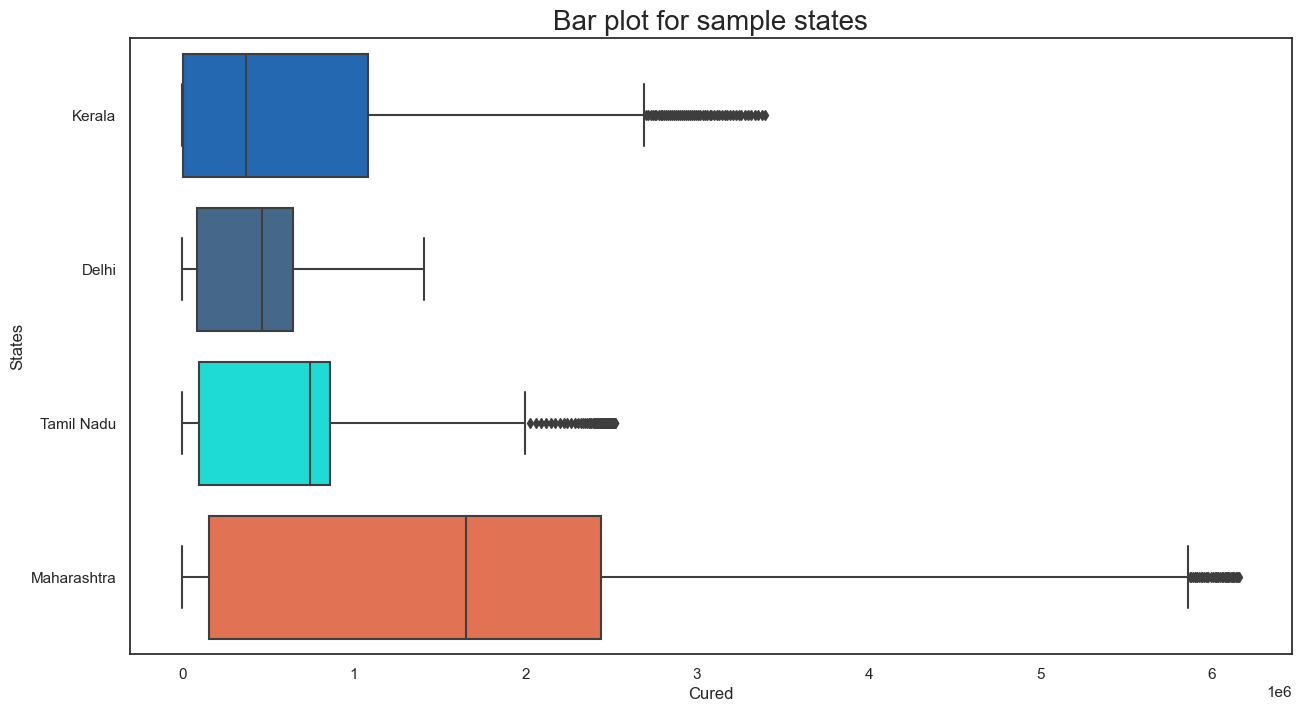

In [21]:
fig=plt.figure(figsize=(15,8))
sns.boxplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Cured',y='States')
plt.title("Bar plot for sample states" ,size=20)

In [22]:
median_states.groupby(by=['States']).median().style.bar(['Cured'])

C:\Users\Vinith MH\AppData\Local\Temp\ipykernel_13360\1381347377.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_states.groupby(by=['States']).median().style.bar(['Cured'])


,Sno,Cured,Deaths,Confirmed,Active_cases
States,,,,,
Delhi,8617.500000,463755.500000,8100.000000,513934.000000,10110.000000
Kerala,8065.500000,368848.000000,1573.000000,455388.000000,46928.500000
Maharashtra,8733.500000,1652928.500000,46638.000000,1782284.500000,96548.000000
Tamil Nadu,8726.000000,745848.000000,11605.000000,769995.000000,20407.000000


<AxesSubplot: xlabel='Date', ylabel='Deaths'>

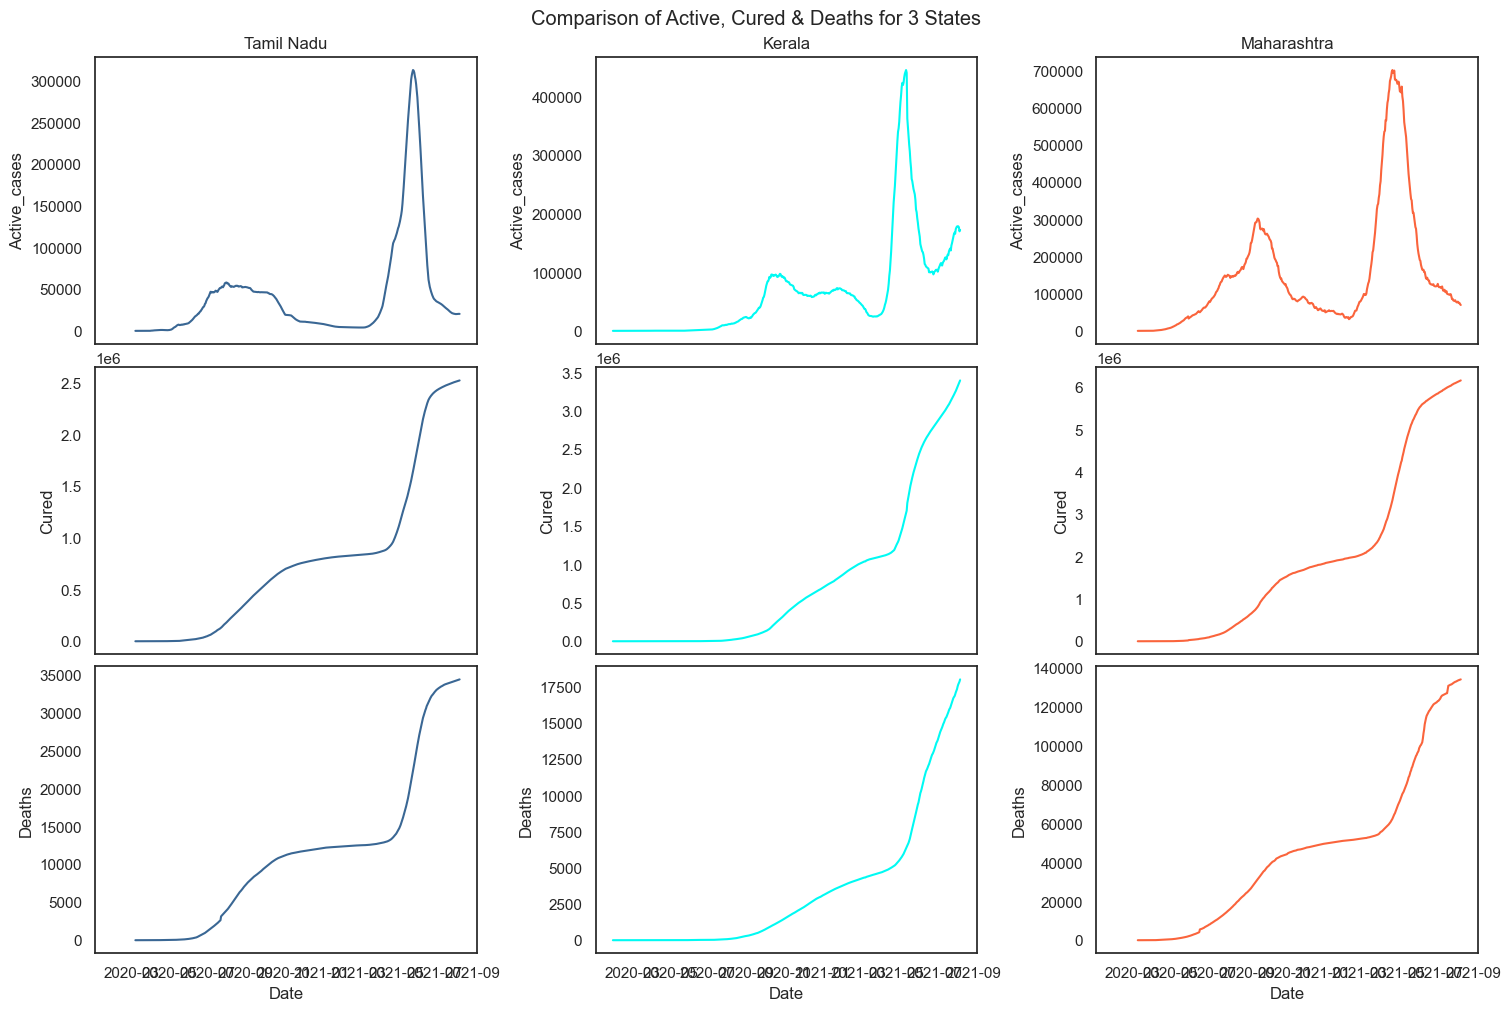

In [23]:
states=['Kerala', 'Tamil Nadu', 'Maharashtra']
tn=df[df['States']=='Tamil Nadu']
kl=df[df['States']=='Kerala']
mh=df[df['States']=='Maharashtra']


fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
plt.suptitle("Comparison of Active, Cured & Deaths for 3 States")

sns.lineplot(data=tn, x='Date',y='Active_cases', ax=ax[0,0], color=colors[1])
ax[0,0].set_title("Tamil Nadu")
sns.lineplot(data=tn, x='Date',y='Cured', ax=ax[1,0], color=colors[1])
sns.lineplot(data=tn, x='Date',y='Deaths', ax=ax[2,0], color=colors[1])
    
sns.lineplot(data=kl, x='Date',y='Active_cases', ax=ax[0,1], color=colors[2])
ax[0,1].set_title("Kerala")
sns.lineplot(data=kl, x='Date',y='Cured', ax=ax[1,1], color=colors[2])
sns.lineplot(data=kl, x='Date',y='Deaths', ax=ax[2,1], color=colors[2])

sns.lineplot(data=mh, x='Date',y='Active_cases', ax=ax[0,2], color=colors[3])
ax[0,2].set_title("Maharashtra")
sns.lineplot(data=mh, x='Date',y='Cured', ax=ax[1,2], color=colors[3])
sns.lineplot(data=mh, x='Date',y='Deaths', ax=ax[2,2], color=colors[3])

<AxesSubplot: xlabel='Deaths', ylabel='Density'>

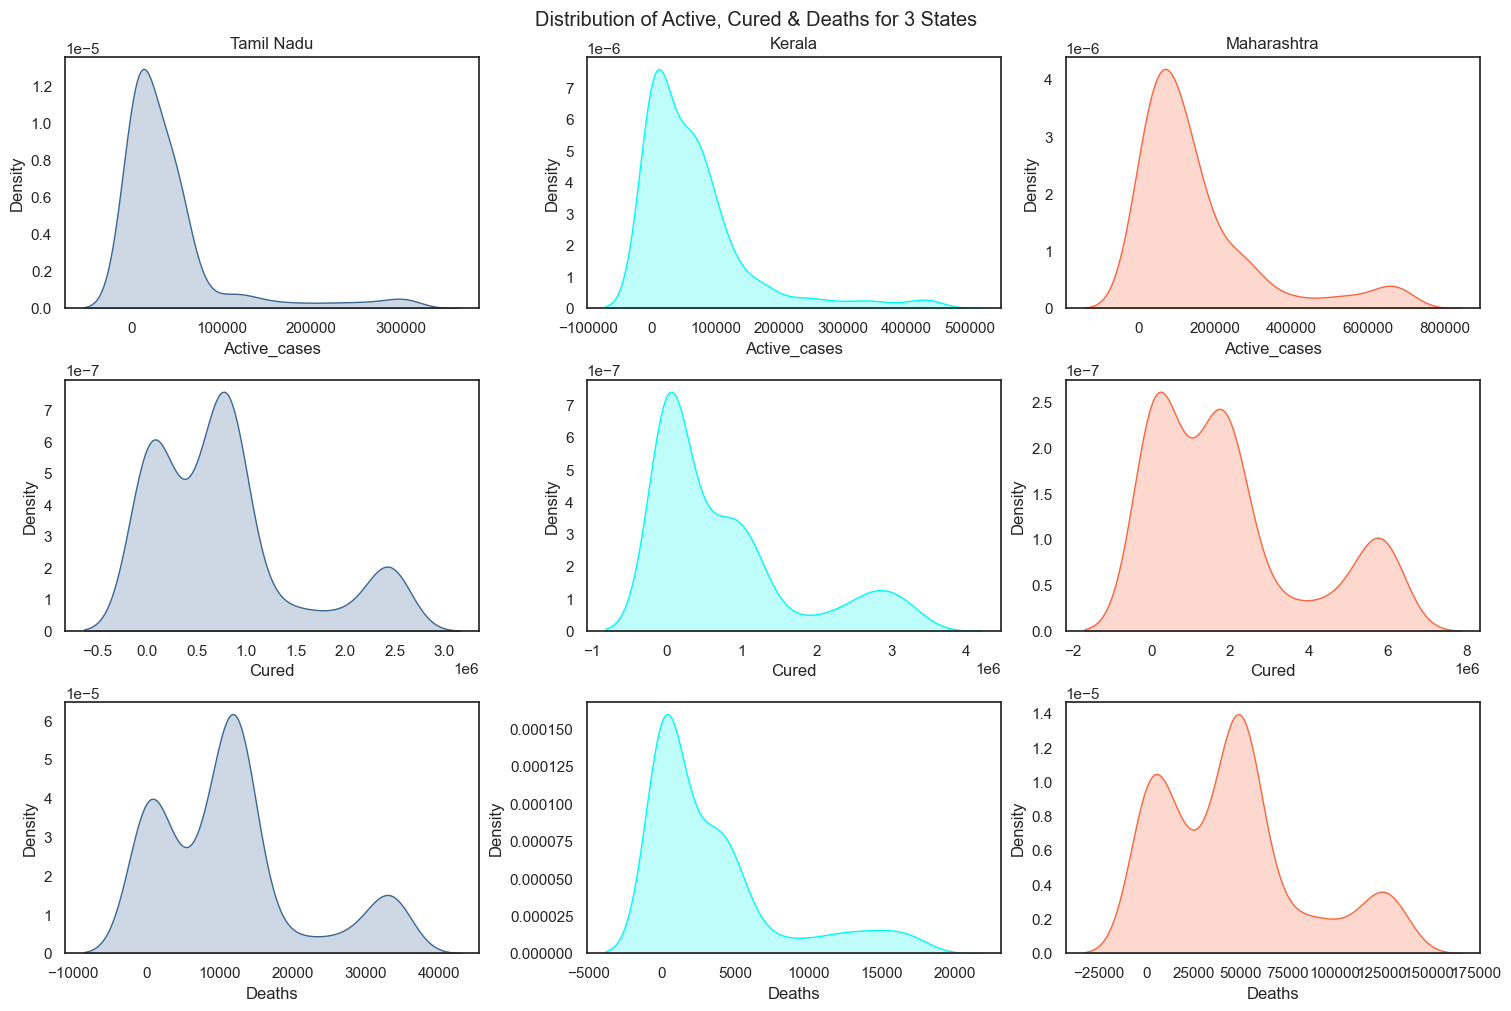

In [24]:
states=['Kerala', 'Tamil Nadu', 'Maharashtra']
tn=df[df['States']=='Tamil Nadu']
kl=df[df['States']=='Kerala']
mh=df[df['States']=='Maharashtra']

fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=False, sharey=False, constrained_layout=True )
plt.suptitle("Distribution of Active, Cured & Deaths for 3 States")
    
sns.kdeplot(data=tn['Active_cases'],ax=ax[0,0],color=colors[1], fill=True)
ax[0,0].set_title("Tamil Nadu")
sns.kdeplot(data=tn['Cured'],  ax=ax[1,0],color=colors[1],fill=True)
sns.kdeplot(data=tn['Deaths'], ax=ax[2,0], color=colors[1],fill=True)

sns.kdeplot(data=kl['Active_cases'], ax=ax[0,1], color=colors[2],fill=True)
ax[0,1].set_title("Kerala")
sns.kdeplot(data=kl['Cured'], ax=ax[1,1], color=colors[2],fill=True)
sns.kdeplot(data=kl['Deaths'], ax=ax[2,1], color=colors[2],fill=True)

sns.kdeplot(data=mh['Active_cases'], ax=ax[0,2], color=colors[3],fill=True)
ax[0,2].set_title("Maharashtra")
sns.kdeplot(data=mh['Cured'], ax=ax[1,2], color=colors[3],fill=True)
sns.kdeplot(data=mh['Deaths'], ax=ax[2,2], color=colors[3],fill=True)

# Statistical testing

# Cure Rate Testing

In [32]:
tn=df[df['States']=='Tamil Nadu']['Cured']
mh=df[df['States']=='Maharashtra']['Cured']
kl=df[df['States']=='Kerala']['Cured']

from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

# Null Hyposthesis¶
H0 - mean of states cure rate are significant

H1 - mean of states cure rate are not significant

Significant rate: 0.05

In [27]:
st,p_value=ttest_ind(tn,kl)
if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Kerala'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Kerala'))

st,p_value=ttest_ind(tn,mh)
if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Maharashtra'))

st,p_value=ttest_ind(kl,mh)
if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Kerala','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Kerala','Maharashtra'))

Both states Tamil Nadu & Kerala have no significant difference in Cure rate
Both states Tamil Nadu & Maharashtra have significant difference in Cure rate
Both states Kerala & Maharashtra have significant difference in Cure rate


# Proportion Test

In [28]:
tn_cured = df[df['States']=='Tamil Nadu']['Cured'].max()
mh_cured=df[df['States']=='Maharashtra']['Cured'].max()
kl_cured=df[df['States']=='Kerala']['Cured'].max()

tn_active = df[df['States']=='Tamil Nadu']['Confirmed'].max()
mh_active=df[df['States']=='Maharashtra']['Confirmed'].max()
kl_active=df[df['States']=='Kerala']['Confirmed'].max()

In [29]:
print([tn_cured, mh_cured] , [tn_active, mh_active])
print(f' Proportion of cured cases in Tamil Nadu, Maharastra = {round(tn_cured/tn_active,2)}%, {round(mh_cured/mh_active,2)}% respectively \n')

print([tn_cured, kl_cured] , [tn_active, kl_active])
print(f' Proportion of cured cases in Tamil Nadu, Kerala = {round(tn_cured/tn_active,2)}%, {round(kl_cured/kl_active,2)}% respectively \n')

print([mh_cured, kl_cured] , [mh_active, kl_active])
print(f' Proportion of cured cases in Tamil Nadu, Kerala = {round(mh_cured/mh_active,2)}%, {round(kl_cured/kl_active,2)}% respectively \n')

[2524400, 6159676] [2579130, 6363442]
 Proportion of cured cases in Tamil Nadu, Maharastra = 0.98%, 0.97% respectively 

[2524400, 3396184] [2579130, 3586693]
 Proportion of cured cases in Tamil Nadu, Kerala = 0.98%, 0.95% respectively 

[6159676, 3396184] [6363442, 3586693]
 Proportion of cured cases in Tamil Nadu, Kerala = 0.97%, 0.95% respectively 



In [33]:
stat, p_value = proportions_ztest([tn_cured, mh_cured] , [tn_active, mh_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Maharashtra'))

stat, p_value = proportions_ztest([tn_cured, kl_cured] , [tn_active, kl_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Tamil Nadu','Kerala'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Tamil Nadu','Kerala'))

stat, p_value = proportions_ztest([kl_cured, mh_cured] , [kl_active, mh_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Cure rate".format('Kerala','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Cure rate".format('Kerala','Maharashtra'))

Both states Tamil Nadu & Maharashtra have significant difference in Cure rate
Both states Tamil Nadu & Kerala have significant difference in Cure rate
Both states Kerala & Maharashtra have significant difference in Cure rate


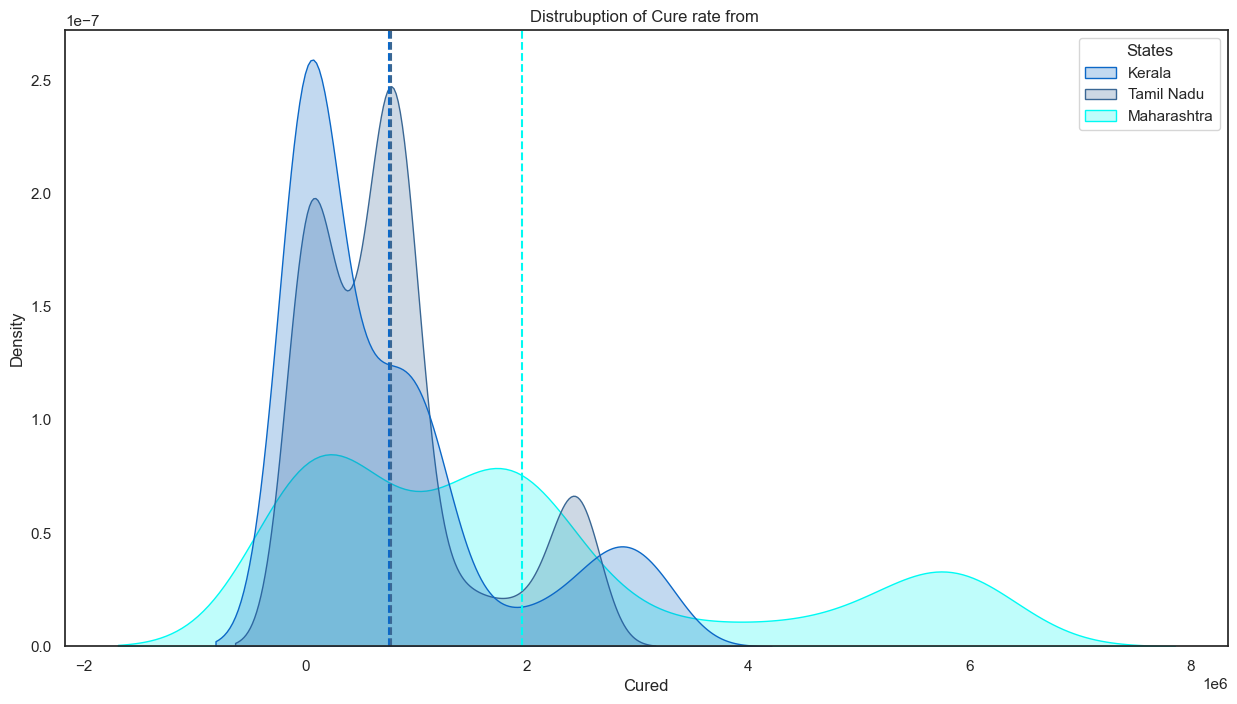

In [34]:
from scipy.stats import norm

fig=plt.figure(figsize=(15,8))
plt.title("Distrubuption of Cure rate from ")

ax=sns.kdeplot(data=median_states[median_states['States'].isin(['Tamil Nadu','Maharashtra','Kerala'])],x='Cured', hue='States', fill=True)
ax.axvline(median_states[median_states['States']=='Kerala']['Cured'].mean(), ls='--', c=colors[0])
ax.axvline(median_states[median_states['States']=='Tamil Nadu']['Cured'].mean(), ls='--', c=colors[1])
ax.axvline(median_states[median_states['States']=='Maharashtra']['Cured'].mean(), ls='--', c=colors[2])

In [35]:
#lets take mean impacted vs mean cured
tn_cured = df[df['States']=='Tamil Nadu']['Deaths'].max()
mh_cured=df[df['States']=='Maharashtra']['Deaths'].max()
kl_cured=df[df['States']=='Kerala']['Deaths'].max()

tn_active = df[df['States']=='Tamil Nadu']['Confirmed'].max()
mh_active=df[df['States']=='Maharashtra']['Confirmed'].max()
kl_active=df[df['States']=='Kerala']['Confirmed'].max()

print([tn_cured, mh_cured] , [tn_active, mh_active])
print(f' Proportion of Death cases in Tamil Nadu, Maharastra = {round(tn_cured/tn_active,2)}%, {round(mh_cured/mh_active,2)}% respectively \n')

print([tn_cured, kl_cured] , [tn_active, kl_active])
print(f' Proportion of Death cases in Tamil Nadu, Kerala = {round(tn_cured/tn_active,2)}%, {round(kl_cured/kl_active,2)}% respectively \n')

print([mh_cured, kl_cured] , [mh_active, kl_active])
print(f' Proportion of Death cases in Tamil Nadu, Kerala = {round(mh_cured/mh_active,2)}%, {round(kl_cured/kl_active,2)}% respectively \n')


stat, p_value = proportions_ztest([tn_cured, mh_cured] , [tn_active, mh_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Death rate".format('Tamil Nadu','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Death rate".format('Tamil Nadu','Maharashtra'))

stat, p_value = proportions_ztest([tn_cured, kl_cured] , [tn_active, kl_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Death rate".format('Tamil Nadu','Kerala'))
else:
    print("Both states {} & {} have no significant difference in Death rate".format('Tamil Nadu','Kerala'))

stat, p_value = proportions_ztest([kl_cured, mh_cured] , [kl_active, mh_active])

if p_value <0.05:
    print("Both states {} & {} have significant difference in Death rate".format('Kerala','Maharashtra'))
else:
    print("Both states {} & {} have no significant difference in Death rate".format('Kerala','Maharashtra'))

[34367, 134201] [2579130, 6363442]
 Proportion of Death cases in Tamil Nadu, Maharastra = 0.01%, 0.02% respectively 

[34367, 18004] [2579130, 3586693]
 Proportion of Death cases in Tamil Nadu, Kerala = 0.01%, 0.01% respectively 

[134201, 18004] [6363442, 3586693]
 Proportion of Death cases in Tamil Nadu, Kerala = 0.02%, 0.01% respectively 

Both states Tamil Nadu & Maharashtra have significant difference in Death rate
Both states Tamil Nadu & Kerala have significant difference in Death rate
Both states Kerala & Maharashtra have significant difference in Death rate


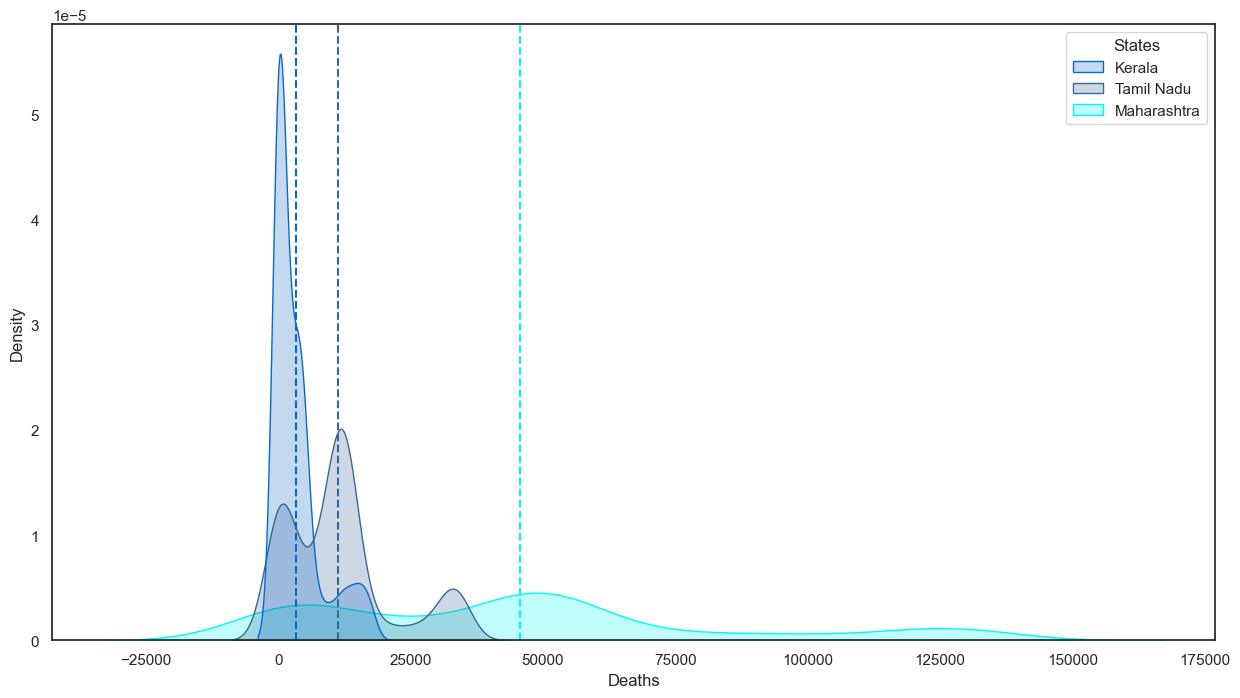

In [36]:
from scipy.stats import norm

fig=plt.figure(figsize=(15,8))

ax=sns.kdeplot(data=median_states[median_states['States'].isin(['Tamil Nadu','Maharashtra','Kerala'])],x='Deaths', hue='States', fill=True)

ax.axvline(median_states[median_states['States']=='Kerala']['Deaths'].mean(), ls='--', c=colors[0])
ax.axvline(median_states[median_states['States']=='Tamil Nadu']['Deaths'].mean(), ls='--', c=colors[1])
ax.axvline(median_states[median_states['States']=='Maharashtra']['Deaths'].mean(), ls='--', c=colors[2])
    